In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

Stations = pd.read_csv('hubway_stations.csv')

In [2]:
Stations.head()

,id,terminal,station,municipal,lat,lng,status
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing
2,5,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing
3,6,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing
4,7,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing


In [3]:
Trips = pd.read_csv('hubway_trips.csv')

In [4]:
Trips.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


In [5]:
Trips.dtypes

seq_id          int64
hubway_id       int64
status         object
duration        int64
start_date     object
strt_statn    float64
end_date       object
end_statn     float64
bike_nr        object
subsc_type     object
zip_code       object
birth_date    float64
gender         object
dtype: object

In [6]:
registered_members_duration = np.array(Trips['duration'].loc[Trips['subsc_type'] == 'Registered'])

In [7]:
registered_members_duration

array([  9, 220,  56, ..., 480, 120, 420], dtype=int64)

In [8]:
casual_members_duration = np.array(Trips['duration'].loc[Trips['subsc_type'] == 'Casual'])

In [9]:
casual_members_duration

array([ 994, 2121, 1315, ...,  780,  300,  540], dtype=int64)

In [10]:
np.mean(registered_members_duration)

733.3289835450383

In [11]:
np.mean(casual_members_duration)

2293.4422135752234

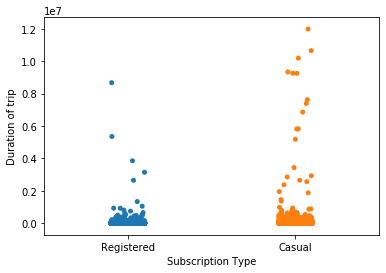

In [12]:
sns.stripplot(x='subsc_type',y='duration', data=Trips)
plt.ylabel('Duration of trip')
plt.xlabel('Subscription Type')
plt.show()

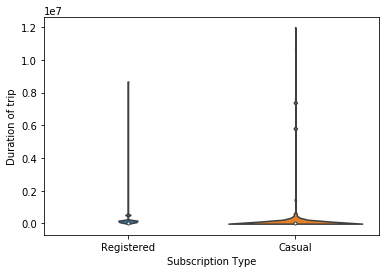

In [13]:
sns.violinplot(x='subsc_type',y='duration', data=Trips)
plt.ylabel('Duration of trip')
plt.xlabel('Subscription Type')
plt.show()

# Conclusion

With this we can conclude that Casual members tend to have (on average) longer trips than Registered members.

Registered trip mean (seconds): 733.3289835450383

Casual trip mean (seconds): 2293.4422135752234

In [14]:
Trips.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


In [15]:
Trips.dtypes

seq_id          int64
hubway_id       int64
status         object
duration        int64
start_date     object
strt_statn    float64
end_date       object
end_statn     float64
bike_nr        object
subsc_type     object
zip_code       object
birth_date    float64
gender         object
dtype: object

In [16]:
Trips['start_date'] = pd.to_datetime(Trips['start_date'], format='%m/%d/%Y %H:%M:%S')

In [43]:
Trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579025 entries, 0 to 1579024
Data columns (total 13 columns):
seq_id        1579025 non-null int64
hubway_id     1579025 non-null int64
status        1579025 non-null object
duration      1579025 non-null int64
start_date    1579025 non-null datetime64[ns]
strt_statn    1579011 non-null float64
end_date      1579025 non-null object
end_statn     1578980 non-null float64
bike_nr       1578559 non-null object
subsc_type    1579025 non-null object
zip_code      1106259 non-null object
birth_date    350644 non-null float64
gender        1106414 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 156.6+ MB


In [33]:
Trips_initial_time = Trips.set_index('start_date').resample('H').count()

In [36]:
Trips_initial_time = Trips_initial_time['duration']

In [68]:
Trips_initial_time[Trips_initial_time == Trips_initial_time.max()]

start_date
2013-08-12 17:00:00    742
Freq: H, Name: duration, dtype: int64

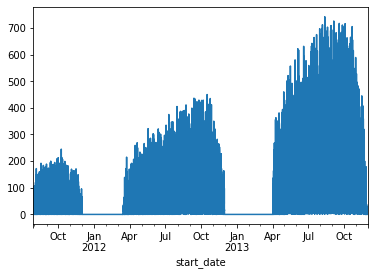

In [65]:
Trips_initial_time.plot()

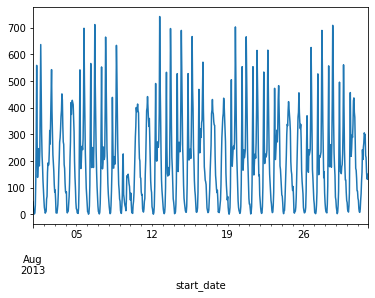

In [69]:
Trips_initial_time['2013-08'].plot()

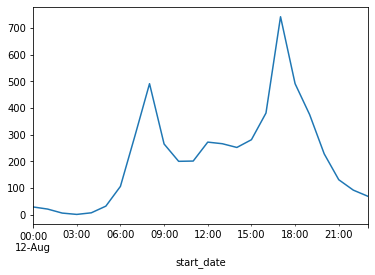

In [73]:
Trips_initial_time['2013-08-12'].plot()

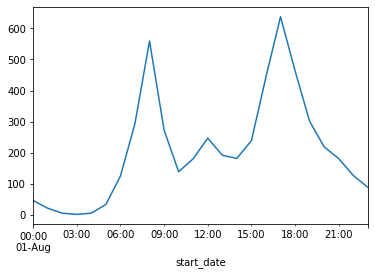

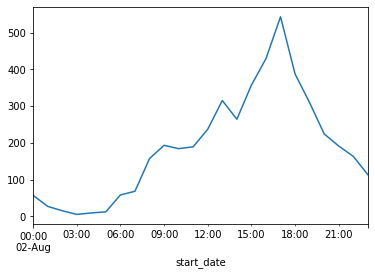

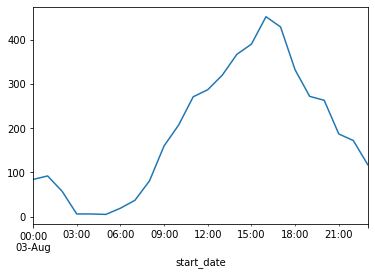

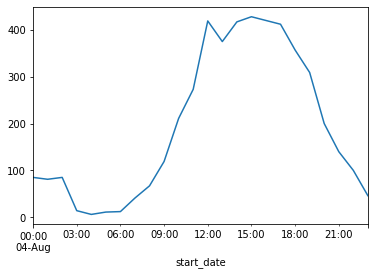

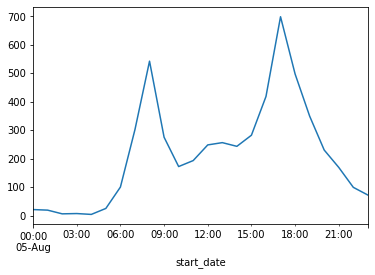

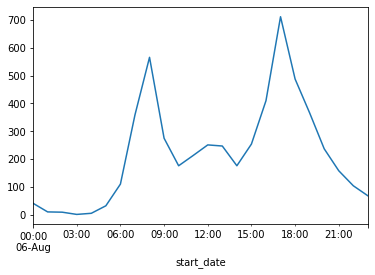

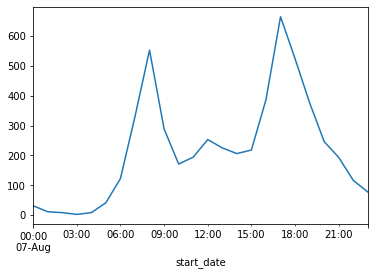

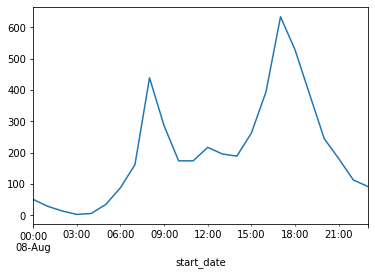

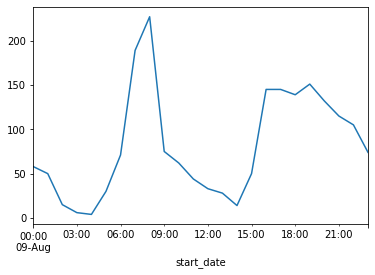

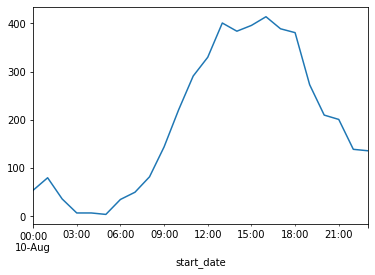

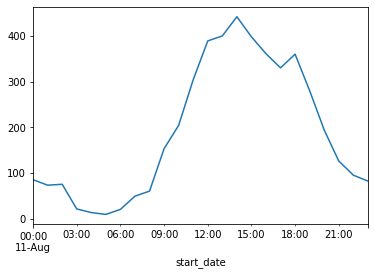

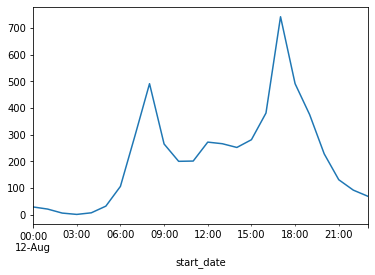

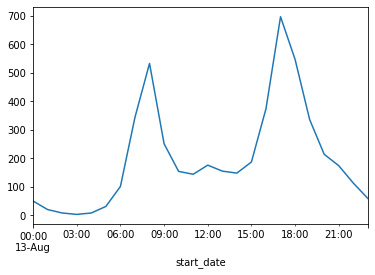

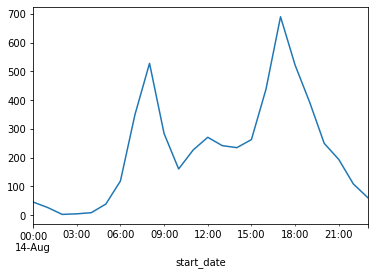

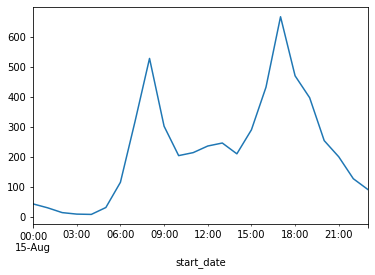

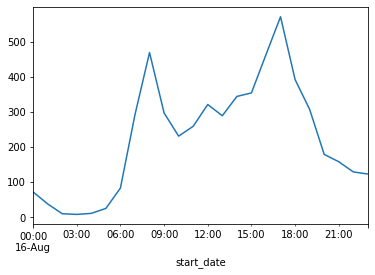

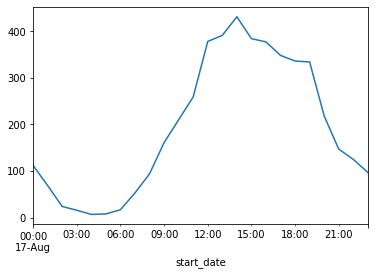

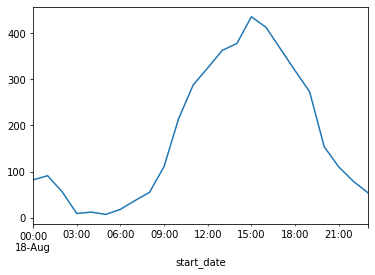

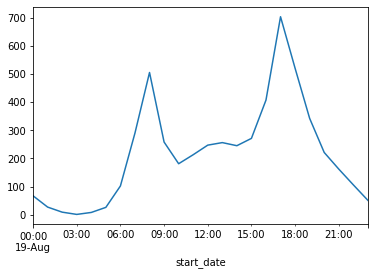

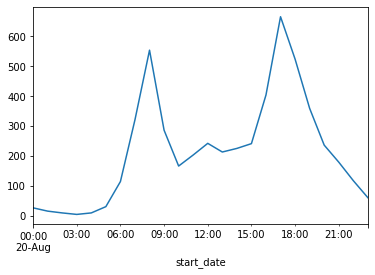

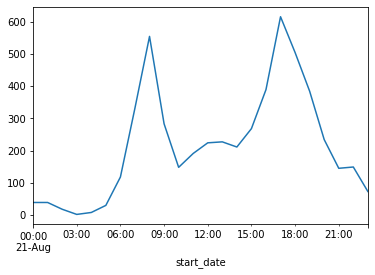

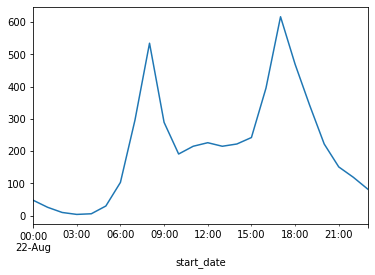

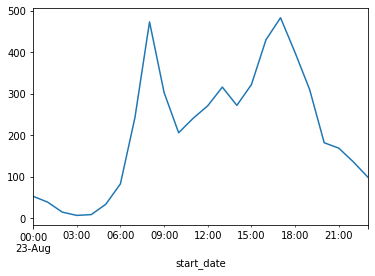

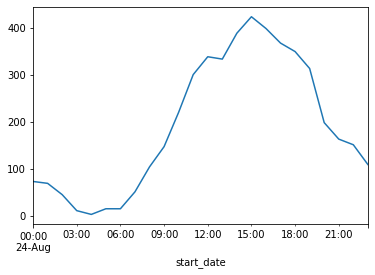

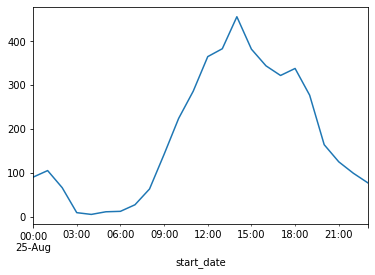

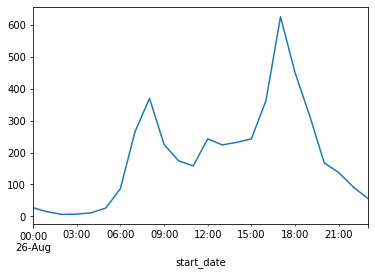

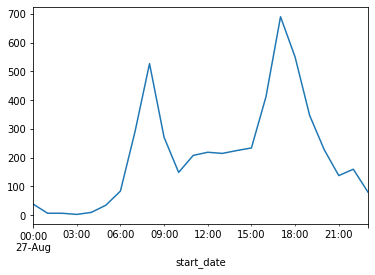

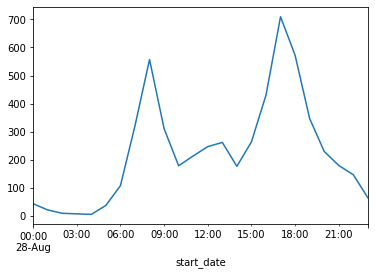

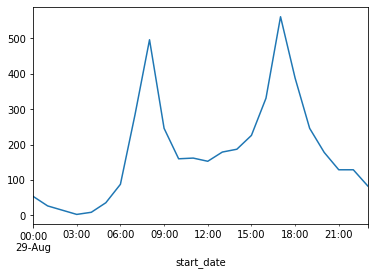

In [93]:
for i in range(1,30):
    Trips_initial_time[str('2013-8-'+str(i))].plot()
    plt.show()

In [95]:
Trips_per_hour=Trips_initial_time.groupby(Trips_initial_time.index.hour).sum()

In [96]:
Trips_per_hour

start_date
0      17826
1      14344
2      10488
3       3056
4       2201
5       7189
6      26780
7      73784
8     128053
9      79240
10     62413
11     74369
12     91815
13     92826
14     91745
15     99831
16    130762
17    176240
18    129882
19     91460
20     62231
21     47600
22     38063
23     26827
Name: duration, dtype: int64

In [100]:
Trips_per_hour.max()

176240

Text(0, 0.5, 'Trips')

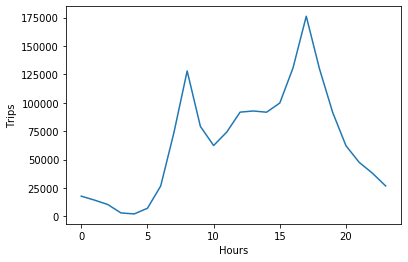

In [99]:
plt.plot(Trips_per_hour)
plt.xlabel('Hours')
plt.ylabel('Trips')

# Conclusion

This graph shows the sum of all trips each hour throughout the whole dataset.

The peak is at hour 17 (5 PM)